# Twitch Data Analysis with Python

## Introduction

Twitch is a popular video live streaming service owned by Amazon that focuses on video game streaming. The website was launched in 2011, and by 2014, was considered the fourth largest source of internet traffic in the United States during peak times, beaten only by Netflix, Google, and Apple. The website was brought to mainstream media attention when Twitch streamer Richard Tyler Blevins, better known by his online alias "Ninja," became a household name after media outlets covered the lucrative earnings he was bringing in, with income estimates reaching $10 million for 2018. With streams reaching over 635,000 concurrent viewers, he was undoubtly the most popular streamer on the site. This was upturned in 2019 when Ninja signed a deal with Microsoft owned Mixer in one of the largest video game streaming upsets of the year. For many, this highlighted the video game streaming war that was already well underway, with Google and Facebook also fighting for a stake in the industry with their respective platforms Youtube Gaming and Facebook Gaming as well.

This project aims to analyze Twitch data regarding trends in viewership in order to better understand this emerging industry. How much viewer growth is seen each year? Are viewers watching a select few games, or is the distribution more evenly spread out? What games are the most popular to stream, and is this changing over time? What other insights can be gained from analyzing top streamers?

The data for this project was scraped from https://twitchstats.net/, which is a third-party website that collects data directly from Twitch through their API. Data about the most popular streamers and top streamers were scraped for the years 2017-2019, as allowed by their robots.txt file.
* https://twitchstats.net/most-popular-games/
* https://twitchstats.net/best-streamers/

## Importing Libraries

The `selenium`, `time`, `bs4`, `pandas`, and `re` libraries are used to properly scrape the data into a DataFrame and clean the resulting DataFrame. The `matplotlib` and `seaborn` libraries are utilized for data visualization, while `numpy` is needed for calculations.

In [1]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Gathering and Overview of the Data

The first DataFrame will contain data regarding the 50 most popular games on Twitch, as measured by average concurrent viewer counts, in 2017, 2018, and 2019.

In [2]:
url_prefix = "https://twitchstats.net/most-popular-games/"
lst = []

for i in range(2017, 2020):
    url = url_prefix + str(i)
    # Selenium is used here since these pages use Javascript
    driver = webdriver.Chrome('C:\Chromedriver\chromedriver.exe')
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    time.sleep(1)
    
    columns = ['year', 'game', 'avg_viewers']
    year = i
    table = []

    divs = soup.find_all('div', attrs={'class': 'lmbx1'})
    for div in divs:
        div = div.get_text('|').split('|')
        game = div[4]
        avg_viewers = int(div[6].replace(',', ''))

        row = [year, game, avg_viewers]
        table.append(row)

    lst.append(pd.DataFrame(table, columns=columns))
    
most_popular_games_df = pd.concat(lst).reset_index(drop=True)

In [3]:
most_popular_games_df

,year,game,avg_viewers
0,2017,League of Legends,116834
1,2017,PLAYERUNKNOWN'S BATTLEGROUNDS,72812
2,2017,Dota 2,51430
3,2017,Hearthstone,50589
4,2017,Counter-Strike: Global Offensive,48021
...,...,...,...
145,2019,Rust,3576
146,2019,Monster Hunter World,3263
147,2019,Tom Clancy's The Division 2,3250
148,2019,Games + Demos,3043


The next DataFrame will grab the top 10 streamers for each year, as measured by average concurrent viewer counts. The website aims to include only streamers that stream for a living, and thus filters for streamers that stream on average at least four hours a day, while filtering out promotional and tournament channels.

Data regarding average concurrent viewer counts and the amount of time spent streaming their top three games will be collected. The goal of this is to determine approximately how much time they spend streaming and what game they mainly stream, if any. Although we will not be collecting data for every single game these top streamers stream, we believe that the top three will provide a comprehensive enough view of their streaming habits for the purposes of this project and avoid cluttering the resulting DataFrame.

In [4]:
url_prefix = "https://twitchstats.net/best-streamers/"
lst = []

for i in range(2017, 2020):
    url = url_prefix + str(i)
    # Selenium is used here since these pages use Javascript
    driver = webdriver.Chrome('C:\Chromedriver\chromedriver.exe')
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    time.sleep(1)
    
    columns = ['year', 'streamer', 'avg_viewers', 'game_1', 'game_1_time', 'game_2', 'game_2_time', 'game_3', 'game_3_time']
    year = i
    table = []
    
    divs = soup.find_all('div', attrs={'class': 'lmbx1'})
    for div in divs[:10]:
        div = div.get_text('|').split('|')
        streamer = div[4]
        avg_viewers = int(div[6].replace(',', ''))
        
        streamer_url_prefix = "https://twitchstats.net/streamer/"
        streamer_url = streamer_url_prefix + streamer + '/' + str(year)
        # Selenium is also used here since these pages use Javascript
        driver = webdriver.Chrome('C:\Chromedriver\chromedriver.exe')
        driver.get(streamer_url)
        streamer_soup = BeautifulSoup(driver.page_source, 'html.parser')
        driver.quit()
        time.sleep(1)

        streamer_games_divs = streamer_soup.find_all('div', attrs={'class': 'progress-bar'})
        games = {}
        for i in range(3):
            try:
                streamer_games_div = streamer_games_divs[i].get_text('|').split('|')
                games[i] = streamer_games_div[:2]
            except IndexError:
                games[i] = [None, None]

        row = [year, streamer, avg_viewers, games[0][0], games[0][1], games[1][0], games[1][1], games[2][0], games[2][1]]
        table.append(row)

    lst.append(pd.DataFrame(table, columns=columns))
    
best_streamers_df = pd.concat(lst).reset_index(drop=True)

In [5]:
best_streamers_df

,year,streamer,avg_viewers,game_1,game_1_time,game_2,game_2_time,game_3,game_3_time
0,2017,lirik,29098,PLAYERUNKNOWN'S BATTLEGROUNDS,"17 Days, 23 Hours, 20 Minutes",Fortnite,"4 Days, 1 Hours, 30 Minutes",Grand Theft Auto V,"4 Days, 0 Hours, 40 Minutes"
1,2017,summit1g,21193,PLAYERUNKNOWN'S BATTLEGROUNDS,"49 Days, 2 Hours, 20 Minutes",Counter-Strike: Global Offensive,"22 Days, 10 Hours, 20 Minutes",Fortnite,"11 Days, 21 Hours, 50 Minutes"
2,2017,imaqtpie,20309,League of Legends,"112 Days, 14 Hours, 0 Minutes",Summoners War: Sky Arena,"8 Hours, 10 Minutes",Star Wars: Force Arena,"7 Hours, 30 Minutes"
3,2017,shroud,18987,PLAYERUNKNOWN'S BATTLEGROUNDS,"56 Days, 21 Hours, 20 Minutes",Counter-Strike: Global Offensive,"20 Days, 4 Hours, 10 Minutes",Escape From Tarkov,"1 Days, 21 Hours, 0 Minutes"
4,2017,drdisrespectlive,18192,PLAYERUNKNOWN'S BATTLEGROUNDS,"40 Days, 11 Hours, 40 Minutes",H1Z1: King of the Kill,"13 Days, 11 Hours, 40 Minutes",Call of Duty: WWII,"1 Days, 7 Hours, 30 Minutes"
5,2017,sodapoppin,17787,IRL,"12 Days, 6 Hours, 50 Minutes",World of Warcraft,"10 Days, 9 Hours, 20 Minutes",Overwatch,"3 Days, 6 Hours, 20 Minutes"
6,2017,nl_kripp,15685,Hearthstone: Heroes of Warcraft,"53 Days, 14 Hours, 10 Minutes",Hearthstone,"8 Days, 3 Hours, 50 Minutes",Shadowverse,"3 Days, 11 Hours, 40 Minutes"
7,2017,yoda,15228,League of Legends,"59 Days, 12 Hours, 40 Minutes",Fortnite,"3 Days, 5 Hours, 30 Minutes",IRL,"19 Hours, 0 Minutes"
8,2017,doublelift,15091,League of Legends,"37 Days, 18 Hours, 10 Minutes",PLAYERUNKNOWN'S BATTLEGROUNDS,"18 Hours, 20 Minutes",None,None
9,2017,dreadztv,13819,Dota 2,"18 Days, 11 Hours, 30 Minutes",PLAYERUNKNOWN'S BATTLEGROUNDS,"4 Days, 21 Hours, 40 Minutes",Warcraft III: The Frozen Throne,"2 Days, 11 Hours, 20 Minutes"


## Modifying the Data

Now that we have collected our raw data, we need to clean and modify it. We will turn the `game_x_time` columns into integer values representing days streamed for each game. If a particular streamer spends more than 65% of their time among the top three games streaming a single game, we will consider that game their main game, otherwise they will be considered a "variety" streamer. This was determined through trial and error in order to most accurately categorize each streamer. We will also include a total of how much time was spent streaming their top three games.

In [6]:
def mins_to_hours(num):
    return num/60

def hours_to_days(num):
    return num/24

def string_to_num(string):
    if string == None:
        return 0
    else:
        days, hours, mins = (0, 0, 0)
        string_split = string.split(',')
        for string in string_split:
            if "Days" in string:
                days = int(string.split("Days")[0].strip())
            if "Hours" in string:
                hours = int(string.split("Hours")[0].strip())
            if "Minutes" in string:
                mins = int(string.split("Minutes")[0].strip())
        total_hours = hours + mins_to_hours(mins)
        total_days = days + hours_to_days(total_hours)
        return total_days
    
best_streamers_df['game_1_days'] = best_streamers_df.game_1_time.apply(string_to_num)
best_streamers_df['game_2_days'] = best_streamers_df.game_2_time.apply(string_to_num)
best_streamers_df['game_3_days'] = best_streamers_df.game_3_time.apply(string_to_num)

best_streamers_df['main_game'] = best_streamers_df.apply(lambda row: 'Variety' if row.game_1_days /\
                                                        (row.game_1_days + row.game_2_days + row.game_3_days)\
                                                        <= 0.65 else row.game_1, axis=1)

best_streamers_df['total_days'] = best_streamers_df.apply(lambda row: row.game_1_days + row.game_2_days + row.game_3_days,\
                                                       axis=1)

best_streamers_df = best_streamers_df[['year', 'streamer', 'avg_viewers', 'game_1', 'game_1_days', 'game_2', 'game_2_days',\
                                       'game_3', 'game_3_days', 'main_game', 'total_days']]

best_streamers_df

,year,streamer,avg_viewers,game_1,game_1_days,game_2,game_2_days,game_3,game_3_days,main_game,total_days
0,2017,lirik,29098,PLAYERUNKNOWN'S BATTLEGROUNDS,17.972222,Fortnite,4.062500,Grand Theft Auto V,4.027778,PLAYERUNKNOWN'S BATTLEGROUNDS,26.062500
1,2017,summit1g,21193,PLAYERUNKNOWN'S BATTLEGROUNDS,49.097222,Counter-Strike: Global Offensive,22.430556,Fortnite,11.909722,Variety,83.437500
2,2017,imaqtpie,20309,League of Legends,112.583333,Summoners War: Sky Arena,0.340278,Star Wars: Force Arena,0.312500,League of Legends,113.236111
3,2017,shroud,18987,PLAYERUNKNOWN'S BATTLEGROUNDS,56.888889,Counter-Strike: Global Offensive,20.173611,Escape From Tarkov,1.875000,PLAYERUNKNOWN'S BATTLEGROUNDS,78.937500
4,2017,drdisrespectlive,18192,PLAYERUNKNOWN'S BATTLEGROUNDS,40.486111,H1Z1: King of the Kill,13.486111,Call of Duty: WWII,1.312500,PLAYERUNKNOWN'S BATTLEGROUNDS,55.284722
5,2017,sodapoppin,17787,IRL,12.284722,World of Warcraft,10.388889,Overwatch,3.263889,Variety,25.937500
6,2017,nl_kripp,15685,Hearthstone: Heroes of Warcraft,53.590278,Hearthstone,8.159722,Shadowverse,3.486111,Hearthstone: Heroes of Warcraft,65.236111
7,2017,yoda,15228,League of Legends,59.527778,Fortnite,3.229167,IRL,0.791667,League of Legends,63.548611
8,2017,doublelift,15091,League of Legends,37.756944,PLAYERUNKNOWN'S BATTLEGROUNDS,0.763889,None,0.000000,League of Legends,38.520833
9,2017,dreadztv,13819,Dota 2,18.479167,PLAYERUNKNOWN'S BATTLEGROUNDS,4.902778,Warcraft III: The Frozen Throne,2.472222,Dota 2,25.854167


## Viewership

With our data ready for analysis, we can begin to look into viewership trends across the years. How much has viewership grown over the past three years?

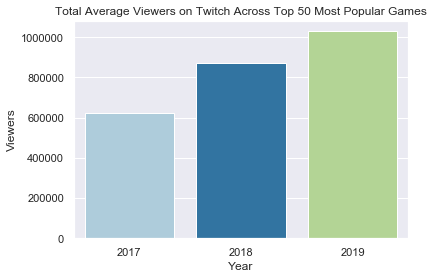

In [7]:
sns.set(style='darkgrid', palette='Paired')
fig, ax = plt.subplots()
sns.barplot(data=most_popular_games_df, x='year', y='avg_viewers', estimator=sum, ci=None)
ax.set_title('Total Average Viewers on Twitch Across Top 50 Most Popular Games')
ax.set_xlabel('Year')
ax.set_ylabel('Viewers')
plt.show()

Average viewership among the top 50 most popular games has grown by approximately 200,000 per year since 2017. As of 2019, the top 50 games totaled an averaged concurrent viewer count of over one million!

Are these viewers distributed relatively evenly across different games, or do certain games account for a lion's share of all viewers?

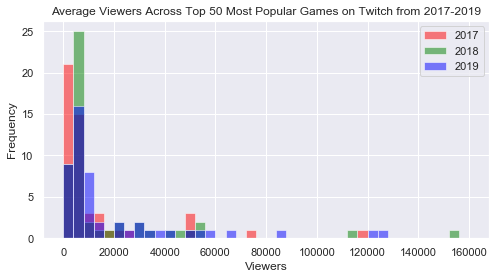

In [8]:
sns.set(style='darkgrid', palette=('red', 'green', 'blue'))
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(most_popular_games_df[most_popular_games_df.year == 2017].avg_viewers, range=(0, 160000), bins=40,\
        alpha=0.5)
ax.hist(most_popular_games_df[most_popular_games_df.year == 2018].avg_viewers, range=(0, 160000), bins=40,\
        alpha=0.5)
ax.hist(most_popular_games_df[most_popular_games_df.year == 2019].avg_viewers, range=(0, 160000), bins=40,\
        alpha=0.5)
ax.legend([2017, 2018, 2019])
ax.set_title('Average Viewers Across Top 50 Most Popular Games on Twitch from 2017-2019')
ax.set_xlabel('Viewers')
ax.set_ylabel('Frequency')
plt.show()

In [9]:
print("The average viewership across the top 50 most popular games on Twitch in 2019 was {0}"\
      .format(np.mean(most_popular_games_df[most_popular_games_df.year == 2019].avg_viewers)))
print("The median viewership across the top 50 most popular games on Twitch in 2019 was {0}"\
      .format(np.median(most_popular_games_df[most_popular_games_df.year == 2019].avg_viewers)))
print("The standard deviation for viewership across the top 50 most popular games on Twitch in 2019 was {0}"\
      .format(np.std(most_popular_games_df[most_popular_games_df.year == 2019].avg_viewers)))

The average viewership across the top 50 most popular games on Twitch in 2019 was 20588.1
The median viewership across the top 50 most popular games on Twitch in 2019 was 7538.0
The standard deviation for viewership across the top 50 most popular games on Twitch in 2019 was 28027.321135813174


The distribution of viewers is heavily skewed right, with the majority of games receiving less than 10,000 average viewers, while some have reached past 150,000 viewers on average!

## Most Popular Games

Which games had the highest average concurrent viewer count for 2019?

In [10]:
top_10_most_popular_games_df = pd.concat([most_popular_games_df[most_popular_games_df.year == 2017][:10],
                                          most_popular_games_df[most_popular_games_df.year == 2018][:10],
                                          most_popular_games_df[most_popular_games_df.year == 2019][:10]])

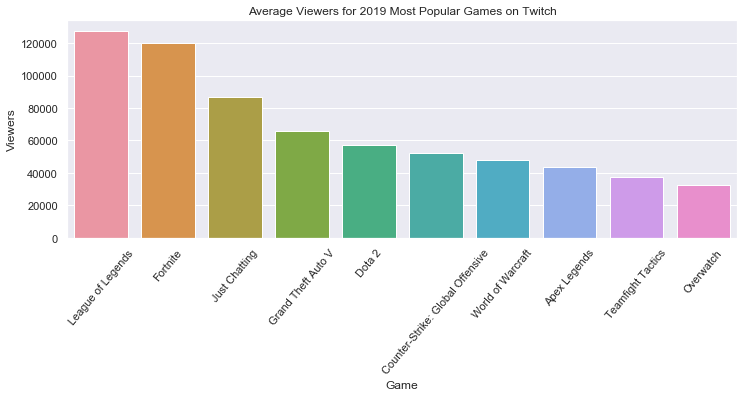

In [11]:
sns.set(style='darkgrid', palette='husl')
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=top_10_most_popular_games_df[top_10_most_popular_games_df.year == 2019],\
            x='game', y='avg_viewers')
plt.xticks(rotation=50)
ax.set_xlabel('Game')
ax.set_ylabel('Viewers')
ax.set_title('Average Viewers for 2019 Most Popular Games on Twitch')
plt.show()

In [12]:
print("The total average viewership among the top 10 most popular games on Twitch is {0}"\
      .format(top_10_most_popular_games_df[top_10_most_popular_games_df.year == 2019].avg_viewers.sum()))

The total average viewership among the top 10 most popular games on Twitch is 672517


League of Legends holds the number one spot, with an average viewer count of over 120,000 viewers. The top 10 games total an average viewer count of over 650,000 viewers.

Next, we will look at how the most popular games on Twitch have changed over time. Note that the "IRL" ("In Real Life") category of games from 2017 and 2018 was changed to "Just Chatting" in 2019, however the two represent the same concept: streaming without a focus on gaming.

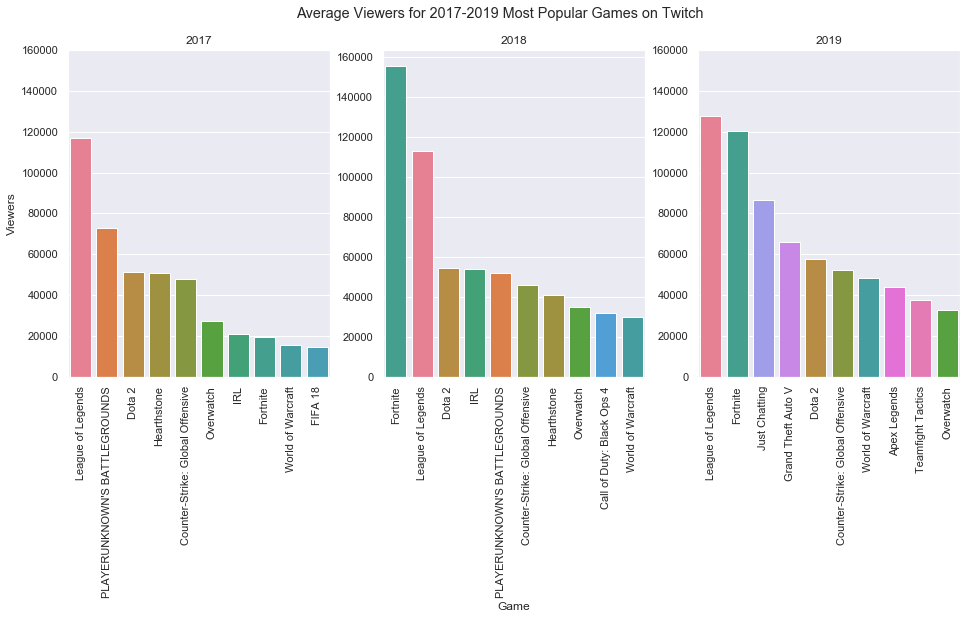

In [13]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Average Viewers for 2017-2019 Most Popular Games on Twitch')

unique = top_10_most_popular_games_df.game.unique()
palette = dict(zip(unique, sns.color_palette('husl', 15)))

sns.barplot(data=top_10_most_popular_games_df[top_10_most_popular_games_df.year == 2017], x='game', y='avg_viewers',\
            ax=ax1, palette=palette)
ax1.set_title('2017')
ax1.set_yticks(range(0, 180000, 20000))
ax1.set_xlabel(None)
ax1.set_ylabel('Viewers')

sns.barplot(data=top_10_most_popular_games_df[top_10_most_popular_games_df.year == 2018], x='game', y='avg_viewers',\
            ax=ax2, palette=palette)
ax2.set_title('2018')
ax2.set_yticks(range(0, 180000, 20000))
ax2.set_xlabel('Game')
ax2.set_ylabel(None)

sns.barplot(data=top_10_most_popular_games_df[top_10_most_popular_games_df.year == 2019], x='game', y='avg_viewers',\
            ax=ax3, palette=palette)
ax3.set_title('2019')
ax3.set_yticks(range(0, 180000, 20000))
ax3.set_xlabel(None)
ax3.set_ylabel(None)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

From the past three years, we can see the sudden rise and subsequent slight fall of Fortnite. The game was released in summer of 2017, and averaged a relatively modest average viewer count of 20,000, before surging to the number one spot in 2018 with an average viewer count of over 150,000. The game eventually settled to the number two spot in 2019, with an average viewer count of around 120,000 viewers. Did popular Fortnite streamer Ninja's move to Mixer in 2019 result in that fall, or has the game simply moved past the initial popularity phase? We can also see that the IRL/Just Chatting category has grown in popularity, roughly doubling its viewer count every year, and currently holds the number three spot as of 2019.

## Most Popular Streamers

Now that we have taken a look into the top games on twitch, let's begin analyzing their top streamers. How much time do these top streamers usually spend streaming?

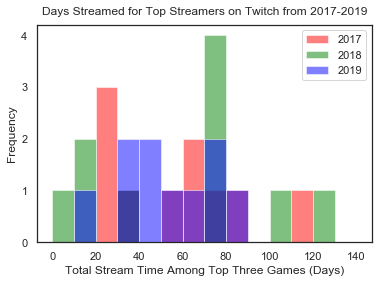

In [18]:
sns.set(style='white', palette=('red', 'green', 'blue'))
fig, ax = plt.subplots()
ax.hist(best_streamers_df[best_streamers_df.year == 2017].total_days, range=(0, 140), bins=14, alpha=0.5)
ax.hist(best_streamers_df[best_streamers_df.year == 2018].total_days, range=(0, 140), bins=14, alpha=0.5)
ax.hist(best_streamers_df[best_streamers_df.year == 2019].total_days, range=(0, 140), bins=14, alpha=0.5)
ax.set_title('Days Streamed for Top Streamers on Twitch from 2017-2019', pad=10)
ax.set_xlabel('Total Stream Time Among Top Three Games (Days)')
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_ylabel('Frequency')
ax.legend([2017, 2018, 2019])
plt.show()

The distribution for stream time among top streamers is quite varied, with some spending over 120 days streaming in a single calendar year, while others spend as little as less than 10 days streaming. As noted earlier, the time spent streaming data in this project collects the total amount of time each streamer spent streaming their top three games. Although this does not represent the true value of their total stream time, we believe that this estimate provides a comprehensive enough view of their streaming habits for the purposes of this project.

With such a varied distribution of values regarding stream time, how does total stream time affect stream popularity? To find out, we will plot a scatter plot with a line of best fit across the data.

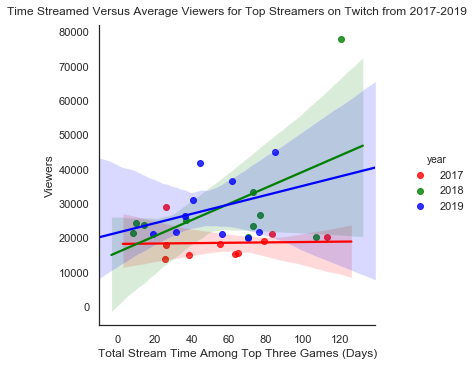

In [15]:
palette = sns.color_palette(['red', 'green', 'blue'])
sns.lmplot(data=best_streamers_df, x='total_days', y='avg_viewers', hue='year', palette=palette)
plt.title('Time Streamed Versus Average Viewers for Top Streamers on Twitch from 2017-2019', pad=10)
plt.xlabel('Total Stream Time Among Top Three Games (Days)')
plt.ylabel('Viewers')
plt.show()

There is an overall slight positive correlation between total stream time and average viewer counts, however the relationship is fairly weak. In fact, in 2017 there appears to have been no correlation between the two at all. It is important to remember that the data only accounts for the top 10 streamers each year. It is possible that at that point in their careers, each streamer has amassed a large enough following to not require constant streaming to maintain their popularity. A plot of time spent streaming versus average viewers for *all* twitch streamers may look quite different.

Finally, let's look into what games were streamed most often by top streamers.

In [16]:
best_streamers_games = best_streamers_df.groupby(['year', 'main_game']).streamer.count().reset_index()
best_streamers_games = best_streamers_games.rename(columns={'streamer': 'counts'})\
                                           .sort_values(by=['year', 'counts'], ascending=[True, False])\
                                           .reset_index(drop=True)

best_streamers_games_2017 = best_streamers_games[best_streamers_games.year == 2017]
best_streamers_games_2018 = best_streamers_games[best_streamers_games.year == 2018]
best_streamers_games_2019 = best_streamers_games[best_streamers_games.year == 2019]

best_streamers_games

,year,main_game,counts
0,2017,League of Legends,3
1,2017,PLAYERUNKNOWN'S BATTLEGROUNDS,3
2,2017,Variety,2
3,2017,Dota 2,1
4,2017,Hearthstone: Heroes of Warcraft,1
5,2018,Fortnite,5
6,2018,Variety,4
7,2018,League of Legends,1
8,2019,Variety,6
9,2019,Fortnite,2


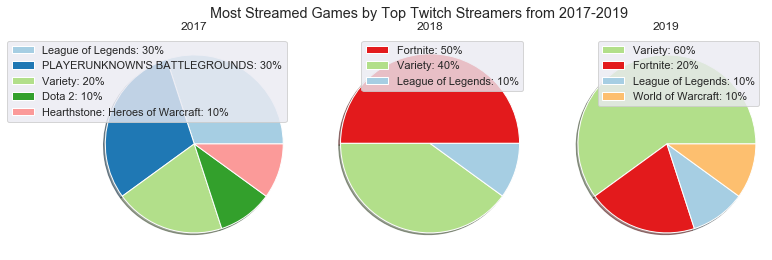

In [17]:
sns.set(style='darkgrid', palette='Paired')
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Most Streamed Games by Top Twitch Streamers from 2017-2019')

color_dict = dict(zip(best_streamers_games.main_game.unique(),\
                      sns.color_palette('Paired', best_streamers_games.main_game.nunique())))

percentage_1 = 100 * np.array(best_streamers_games_2017.counts) / sum(np.array(best_streamers_games_2017.counts))
ax1.pie(best_streamers_games_2017.counts, shadow=True,\
        colors=[color_dict[v] for v in best_streamers_games_2017.main_game])
ax1.legend(['{0}: {1:0.0f}%'.format(a, b) for (a, b) in zip(best_streamers_games_2017.main_game, percentage_1)])
ax1.set_title('2017')
ax1.axis('equal')

percentage_2 = 100 * np.array(best_streamers_games_2018.counts) / sum(np.array(best_streamers_games_2018.counts))
ax2.pie(best_streamers_games_2018.counts, shadow=True,\
        colors=[color_dict[v] for v in best_streamers_games_2018.main_game])
ax2.legend(['{0}: {1:0.0f}%'.format(a, b) for (a, b) in zip(best_streamers_games_2018.main_game, percentage_2)])
ax2.set_title('2018')
ax2.axis('equal')

percentage_3 = 100 * np.array(best_streamers_games_2019.counts) / sum(np.array(best_streamers_games_2019.counts))
ax3.pie(best_streamers_games_2019.counts, shadow=True,\
        colors=[color_dict[v] for v in best_streamers_games_2019.main_game])
ax3.legend(['{0}: {1:0.0f}%'.format(a, b) for (a, b) in zip(best_streamers_games_2019.main_game, percentage_3)])
ax3.set_title('2019')
ax3.axis('equal')

plt.show()

From the data, it is clear that variety streamers are becoming more popular over time. In 2017, only two out of the top 10 streamers were variety streamers, while in 2019, six of the top 10 streamers were categorized as variety streamers. We can also see the rise and slight fall of Fortnite's popularity from these charts as well. In addition, World of Warcraft also appeared among the top in 2019, which can likely be attributed in part to the release of World of Warcraft Classic. It is also interesting to note that despite being the most popular game in terms of total viewership, League of Legends has seen a decrease in representation among top streamers.

## Summary and Closing Thoughts

With this project, we have been able to take a glimpse into the large and growing industry of video game streaming. Average concurrent viewer counts are on the rise, and well over one million at the time of writing. Most viewers watch a select few games, however Twitch offers users the opportunity to watch or stream practically any game on the market. We have also taken a look into the popularity of different gaming categories over time, and determined that variety content, whether in the form of variety gaming or non-gaming related content (IRL/Just Chatting), is on the rise. This suggests that a significant portion of the viewer base chooses what to watch not based on any particular game, but rather the streamer themselves. Some viewers may be more attracted to streamers and their personalities instead of any one particular game. From a streamer's perspective, we have seen that there is only a mild correlation between total stream time and average viewer counts for top streamers.

To improve upon the research, we could gather data for all the games that streamers streamed in order to get a true value for the total amount of time they spent streaming each year. We could also expand the dataset by gathering the data for the top 100 streamers instead of just the top 10, which would allow us to make more general statements regarding streamer habits. This project chose not to pursue these methods to avoid cluttering the data to make it more readable, and to avoid overloading the website with requests during the scraping process.

Future analysis may look into how Twitch data differs from that of Mixer, Google Gaming, or Facebook Gaming. How do these different platforms compare in terms of total viewer counts, amount of streamers, popular games, and other metrics? One could also look more into streamers themselves and determine what time of day is best to stream, which games are best for channel growth, or how subscriber counts fit into the equation.